<a href="https://colab.research.google.com/github/cassidyhanna/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Cassidy's_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [67]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

data_url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"

df = pd.read_csv(data_url)

df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [68]:
! pip install pandas==0.23.4

In [0]:
time_bins = pd.cut(df['exercise_time'],5) 
age_bins = pd.cut(df['age'],5) 
weight_bins = pd.cut(df['weight'],5) 
 

In [90]:
pd.crosstab(weight_bins , time_bins, normalize='columns')

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
weight,,,,,
"(99.854, 129.2]",0.190647,0.205696,0.318386,0.411458,0.560209
"(129.2, 158.4]",0.158273,0.240506,0.300448,0.385417,0.387435
"(158.4, 187.6]",0.219424,0.294304,0.251121,0.197917,0.052356
"(187.6, 216.8]",0.273381,0.231013,0.130045,0.005208,0.000000
"(216.8, 246.0]",0.158273,0.028481,0.000000,0.000000,0.000000


In [91]:
pd.crosstab(age_bins,time_bins)

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(17.938, 30.4]",52,46,54,61,43
"(30.4, 42.8]",52,55,42,47,57
"(42.8, 55.2]",41,42,39,34,67
"(55.2, 67.6]",46,71,40,41,24
"(67.6, 80.0]",87,102,48,9,0


In [72]:
time_bins = pd.cut(df['exercise_time'], 5) 
pd.crosstab(df['age'], time_bins)

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
18,2,6,4,6,2
19,5,8,3,5,2
20,2,4,3,4,4
21,2,2,6,6,2
22,4,5,6,4,0
23,4,4,7,4,2
24,3,3,5,3,3
25,4,2,2,6,5
26,1,3,2,3,6


This crosstable makes clear the amount of people that workout for a certain period of time workout depending on their age.

In [73]:
time_pp = pd.crosstab(time_bins , weight_bins, normalize = 'columns')
time_pp

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",0.141333,0.131343,0.236434,0.424581,0.830189
"(60.0, 120.0]",0.173333,0.226866,0.360465,0.407821,0.169811
"(120.0, 180.0]",0.189333,0.200000,0.217054,0.162011,0.000000
"(180.0, 240.0]",0.210667,0.220896,0.147287,0.005587,0.000000
"(240.0, 300.0]",0.285333,0.220896,0.038760,0.000000,0.000000


In [74]:
tp_subset = time_pp.iloc[:, [0,4]]
tp_subset

weight,"(99.854, 129.2]","(216.8, 246.0]"
exercise_time,,
"(-0.3, 60.0]",0.141333,0.830189
"(60.0, 120.0]",0.173333,0.169811
"(120.0, 180.0]",0.189333,0.000000
"(180.0, 240.0]",0.210667,0.000000
"(240.0, 300.0]",0.285333,0.000000


I compared the group that weighs the least and the group that weights the most and was able to see that the group that was able to workout the longest was also the group that weighed less

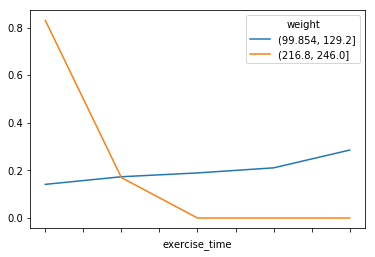

In [75]:
tp_subset.plot()

In [76]:
time_p = pd.crosstab(time_bins,weight_bins)
time_p

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",53,44,61,76,44
"(60.0, 120.0]",65,76,93,73,9
"(120.0, 180.0]",71,67,56,29,0
"(180.0, 240.0]",79,74,38,1,0
"(240.0, 300.0]",107,74,10,0,0


This cross table is comparing someones weight to how long they workout, for example someone who weighs 216.8 - 246.0  lb does not exercise for 240 - 300 mins per week.

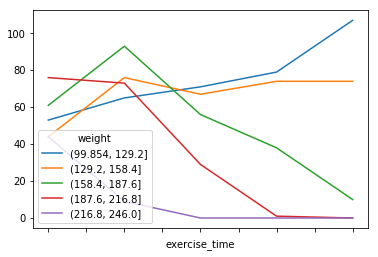

In [77]:
time_p.plot()

As someones weight increases the less amount of time they spend working out & vice versa.

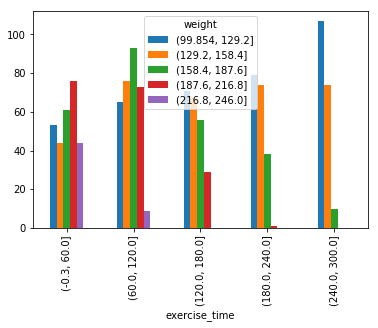

In [92]:
time_p.plot( kind = 'bar')

This bar graph makes visble, that the groups who weigh less tend to be those that workout a longer period of time and those who weigh more tend to be the ones that are unable to workout for a prolonged amount of time.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
The variable types in this data set are floats
2.  What are the relationships between the variables?
 negative relation between the variables, as one goes up the other goes down
3.  Which relationships are "real", and which spurious?
weight and time were real relationships, age was spurious it didnt really effect the data

1. What are the variable types in the data?
The variable types in this data set are floats
2.  What are the relationships between the variables?
 negative relation between the variables, as one goes up the other goes down
3.  Which relationships are "real", and which spurious?
weight and time were real relationships, age was spurious it didnt really effect the data

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)